# Intersecting DGE-tables with text-mined *Ref-genes* in **barley** using `UpsetR`
## Import and prepare data

In [102]:
library(UpSetR, warn.conflicts = FALSE)
library(tidyverse, warn.conflicts = FALSE)
library(cowplot, warn.conflicts = FALSE)
library(RColorBrewer, warn.conflicts = FALSE)
library(pheatmap, warn.conflicts = FALSE)

In [131]:
# import refgenes table
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refgenes/translation2current_versions/")
refgenes_subfam <- read.table("two_times_filtered.subfamilies.tsv", header = TRUE, sep = "\t", stringsAsFactors = FALSE)
# all 3 homeologs + possible imparalogs
# here uniprot identifiers were the key
# this table needs fill = TRUE because of missing values from family etc
refgenes_full <- read.table("two_times_filtered.mapped_to_respective_genome_annotation.tsv", header = TRUE, sep = "\t", fill = TRUE, stringsAsFactors = FALSE)
# this table contain only most likely locus in current annotation
# here genbank id is the key (redundant!! -  more genes were reported)
glimpse(refgenes_subfam)
glimpse(refgenes_full)

Rows: 3,794
Columns: 4
$ Entry      <chr> "Q6RX92", "Q10464", "Q5BHR8", "P33432", "Q6RX92", "B6Z279"…
$ subfamily  <chr> "NP2", "NP3", "NP3", "NP3", "NP1", "NP3", "NP3", "OG000083…
$ taxon      <chr> "Triticum_aestivum_D", "Triticum_aestivum_D", "Triticum_ae…
$ display_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCH…
Rows: 263
Columns: 42
$ gi                                 <chr> "1036031969", "108795022", "109150…
$ genbank_accession                  <chr> "AH013429", "DQ534491", "AB244637"…
$ genbank_accession_version          <chr> "AH013429.2", "DQ534491.1", "AB244…
$ organism                           <chr> "Triticum aestivum", "Triticum aes…
$ mol_type                           <chr> "genomic DNA", "mRNA", "mRNA", "mR…
$ gene                               <chr> NA, NA, "TaGlb2a", "TaGlb2e", "TaG…
$ product                            <chr> "HMW glutenin subunit", "MADS3", "…
$ protein_id                         <chr> "AAR29051.1", "ABG21010.1", "BAE96…
$ descr

In [47]:
# import barley DEGs tables of 0.01 cutoff
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/hordeum/")
flower1_barley <- read.table("deg_flower1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f1_b <- flower1_barley$target_id
flower2_barley <- read.table("deg_flower2_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f2_b <- flower2_barley$target_id
flower3_barley <- read.table("deg_flower3_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f3_b <- flower3_barley$target_id
flower4_barley <- read.table("deg_flower4_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f4_b <- flower4_barley$target_id
flower5_barley <- read.table("deg_flower5_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f5_b <- flower5_barley$target_id
anther1_barley <- read.table("deg_anther1_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a1_b <- anther1_barley$target_id
anther2_barley <- read.table("deg_anther2_signif0_01.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a2_b <- anther2_barley$target_id
glimpse(flower1_barley)
glimpse(id_f1_b)

Rows: 2,946
Columns: 12
$ target_id       <chr> "Horvu_MOREX_7H01G200700", "Horvu_MOREX_4H01G454700",…
$ pval            <dbl> 3.399825e-26, 3.744609e-25, 2.891981e-25, 1.307299e-2…
$ qval            <dbl> 6.856767e-22, 2.517376e-21, 2.517376e-21, 6.591403e-1…
$ test_stat       <dbl> 112.09856, 107.34279, 107.85487, 91.18679, 87.92538, …
$ rss             <dbl> 538.3597, 638.3433, 444.2588, 503.3117, 468.0568, 467…
$ degrees_free    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ mean_obs        <dbl> 4.723927, 4.827195, 4.788425, 2.496434, 3.668173, 2.2…
$ var_obs         <dbl> 4.7498619, 4.8076010, 4.6101010, 3.3501858, 5.0406419…
$ tech_var        <dbl> 0.05990698, 0.04977041, 0.05870737, 0.21000586, 0.060…
$ sigma_sq        <dbl> 2.2910089, 2.7377548, 1.8812875, 1.9878617, 1.9836326…
$ smooth_sigma_sq <dbl> 0.4045290, 0.3768608, 0.3869779, 1.1976406, 0.7989371…
$ final_sigma_sq  <dbl> 2.2910089, 2.7377548, 1.8812875, 1.9878617, 1.9836326…
 chr [1:2946] "Horvu_MOREX_7

In [58]:
# import barley DEGs tables of 0.05 cutoff
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/hordeum/")
flower1_barley_05 <- read.table("deg_flower1_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f1_b_05 <- flower1_barley_05$target_id
flower2_barley_05 <- read.table("deg_flower2_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f2_b_05 <- flower2_barley_05$target_id
flower3_barley_05 <- read.table("deg_flower3_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f3_b_05 <- flower3_barley_05$target_id
flower4_barley_05 <- read.table("deg_flower4_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f4_b_05 <- flower4_barley_05$target_id
flower5_barley_05 <- read.table("deg_flower5_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f5_b_05 <- flower5_barley_05$target_id
anther1_barley_05 <- read.table("deg_anther1_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a1_b_05 <- anther1_barley_05$target_id
anther2_barley_05 <- read.table("deg_anther2_signif0_05.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a2_b_05 <- anther2_barley_05$target_id
glimpse(flower1_barley_05)
glimpse(id_f1_b_05)

Rows: 5,846
Columns: 12
$ target_id       <chr> "Horvu_MOREX_7H01G200700", "Horvu_MOREX_4H01G454700",…
$ pval            <dbl> 3.399825e-26, 3.744609e-25, 2.891981e-25, 1.307299e-2…
$ qval            <dbl> 6.856767e-22, 2.517376e-21, 2.517376e-21, 6.591403e-1…
$ test_stat       <dbl> 112.09856, 107.34279, 107.85487, 91.18679, 87.92538, …
$ rss             <dbl> 538.3597, 638.3433, 444.2588, 503.3117, 468.0568, 467…
$ degrees_free    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ mean_obs        <dbl> 4.723927, 4.827195, 4.788425, 2.496434, 3.668173, 2.2…
$ var_obs         <dbl> 4.7498619, 4.8076010, 4.6101010, 3.3501858, 5.0406419…
$ tech_var        <dbl> 0.05990698, 0.04977041, 0.05870737, 0.21000586, 0.060…
$ sigma_sq        <dbl> 2.2910089, 2.7377548, 1.8812875, 1.9878617, 1.9836326…
$ smooth_sigma_sq <dbl> 0.4045290, 0.3768608, 0.3869779, 1.1976406, 0.7989371…
$ final_sigma_sq  <dbl> 2.2910089, 2.7377548, 1.8812875, 1.9878617, 1.9836326…
 chr [1:5846] "Horvu_MOREX_7

In [101]:
# import barley DEGs tables of 0.1 cutoff
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/hordeum/")
flower1_barley_1 <- read.table("deg_flower1_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f1_b_1 <- flower1_barley_1$target_id
flower2_barley_1 <- read.table("deg_flower2_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f2_b_1 <- flower2_barley_1$target_id
flower3_barley_1 <- read.table("deg_flower3_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f3_b_1 <- flower3_barley_1$target_id
flower4_barley_1 <- read.table("deg_flower4_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f4_b_1 <- flower4_barley_1$target_id
flower5_barley_1 <- read.table("deg_flower5_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_f5_b_1 <- flower5_barley_1$target_id
anther1_barley_1 <- read.table("deg_anther1_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a1_b_1 <- anther1_barley_1$target_id
anther2_barley_1 <- read.table("deg_anther2_signif0_1.csv", header = TRUE, sep = ",", stringsAsFactors = FALSE)
id_a2_b_1 <- anther2_barley_1$target_id
glimpse(flower4_barley_1)

Rows: 12,376
Columns: 12
$ target_id       <chr> "Horvu_MOREX_5H01G494900", "Horvu_MOREX_3H01G465200",…
$ pval            <dbl> 6.232659e-36, 3.963832e-30, 9.023446e-28, 3.903604e-2…
$ qval            <dbl> 1.278755e-31, 4.066297e-26, 6.171135e-24, 2.002256e-2…
$ test_stat       <dbl> 156.60861, 130.06597, 119.29550, 102.69789, 91.18879,…
$ rss             <dbl> 303.37737, 493.40026, 1059.59326, 612.18508, 600.1643…
$ degrees_free    <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ mean_obs        <dbl> 5.270462, 4.184469, 3.109927, 4.636460, 2.092305, 4.6…
$ var_obs         <dbl> 5.6862220, 3.9622626, 10.1913997, 4.5689129, 7.472956…
$ tech_var        <dbl> 0.05413286, 0.06668866, 0.05006038, 0.05300676, 0.096…
$ sigma_sq        <dbl> 1.7957291, 2.9418495, 6.4108742, 3.6798291, 3.5633709…
$ smooth_sigma_sq <dbl> 0.2907854, 0.5801062, 0.9599387, 0.4380757, 1.1042131…
$ final_sigma_sq  <dbl> 1.7957291, 2.9418495, 6.4108742, 3.6798291, 3.5633709…


## Check for barley refgenes vs barley genes overlap

In [91]:
# load tx2gene object for mRNA mapping information
setwd("/nfs/pgsb/projects/comparative_triticeae/phenotype/flower_development/refsets/hordeum/")
m <- read.delim("barley_tx2gene.tsv",stringsAsFactors=FALSE)
colnames(m) <- c("target_id", "gene")
glimpse(m)
# extract target_id
m1 <- as.data.frame(m$target_id, stringsAsFactors = FALSE)
colnames(m1) <- c("target_id")
glimpse(m1)
# extract gene names
m2 <- m$gene
glimpse(m2)

Rows: 49,281
Columns: 2
$ target_id <chr> "Horvu_MOREX_1H01G000100.1", "Horvu_MOREX_1H01G000200.1", "…
$ gene      <chr> "Horvu_MOREX_1H01G000100", "Horvu_MOREX_1H01G000200", "Horv…
Rows: 49,281
Columns: 1
$ target_id <chr> "Horvu_MOREX_1H01G000100.1", "Horvu_MOREX_1H01G000200.1", "…
 chr [1:49281] "Horvu_MOREX_1H01G000100" "Horvu_MOREX_1H01G000200" ...


In [73]:
# extract target_id from text mined refgenes table
b_targetid <- as.data.frame(refgenes_subfam$display_id, stringsAsFactors = FALSE)
colnames(b_targetid) <- c("target_id")
glimpse(b_targetid)

Rows: 3,794
Columns: 1
$ target_id <chr> "TraesCHI1D01G355100.1", "TraesCHI5D01G005000.1", "TraesCHI…


In [95]:
# joining two tables with duplicates remaining -> 777 rows
intersect_bj <- inner_join(b_targetid, m1, by = "target_id")
glimpse(intersect_bj)
# intersection with duplicates removed -> 415 rows
intersect_b <- intersect(b_targetid, m1)
glimpse(intersect_b)

Rows: 777
Columns: 1
$ target_id <chr> "Horvu_MOREX_7H01G134200.1", "Horvu_MOREX_3H01G643000.1", "…
Rows: 415
Columns: 1
$ target_id <chr> "Horvu_MOREX_7H01G134200.1", "Horvu_MOREX_3H01G643000.1", "…


## Translate Refgenes's `display_id` into `gene_id`

In [100]:
# join intersected deduplicated table with original barley reference genome gene-table
trans <- inner_join(intersect_b, m, by = "target_id")
glimpse(trans)
# extract gene_ids into a vector for upsetr intersections
ref_hord <- trans$gene
glimpse(ref_hord)

Rows: 415
Columns: 2
$ target_id <chr> "Horvu_MOREX_7H01G134200.1", "Horvu_MOREX_3H01G643000.1", "…
$ gene      <chr> "Horvu_MOREX_7H01G134200", "Horvu_MOREX_3H01G643000", "Horv…
 chr [1:415] "Horvu_MOREX_7H01G134200" "Horvu_MOREX_3H01G643000" ...


# UpsetR intersections of DEGs & reference genes

In [113]:
# build upset object for barley with qval <= 0.01
listInput_b <- list(ref_hord, id_f1_b, id_f2_b, id_f3_b, id_f4_b, id_f5_b, id_a1_b, id_a2_b)
u_b <- fromList(listInput_b)
colnames(u_b) <- c("Refgenes barley", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant")
str(u_b)

'data.frame':	20097 obs. of  8 variables:
 $ Refgenes barley          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flower vs All & Repro    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Flower vs All            : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Flower vs All & Zadok    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Prim vs Flowering, +leaf : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Prim vs Flowering, flower: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther vs Flower         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther wt vs mutant      : int  0 0 0 0 0 0 0 0 0 0 ...


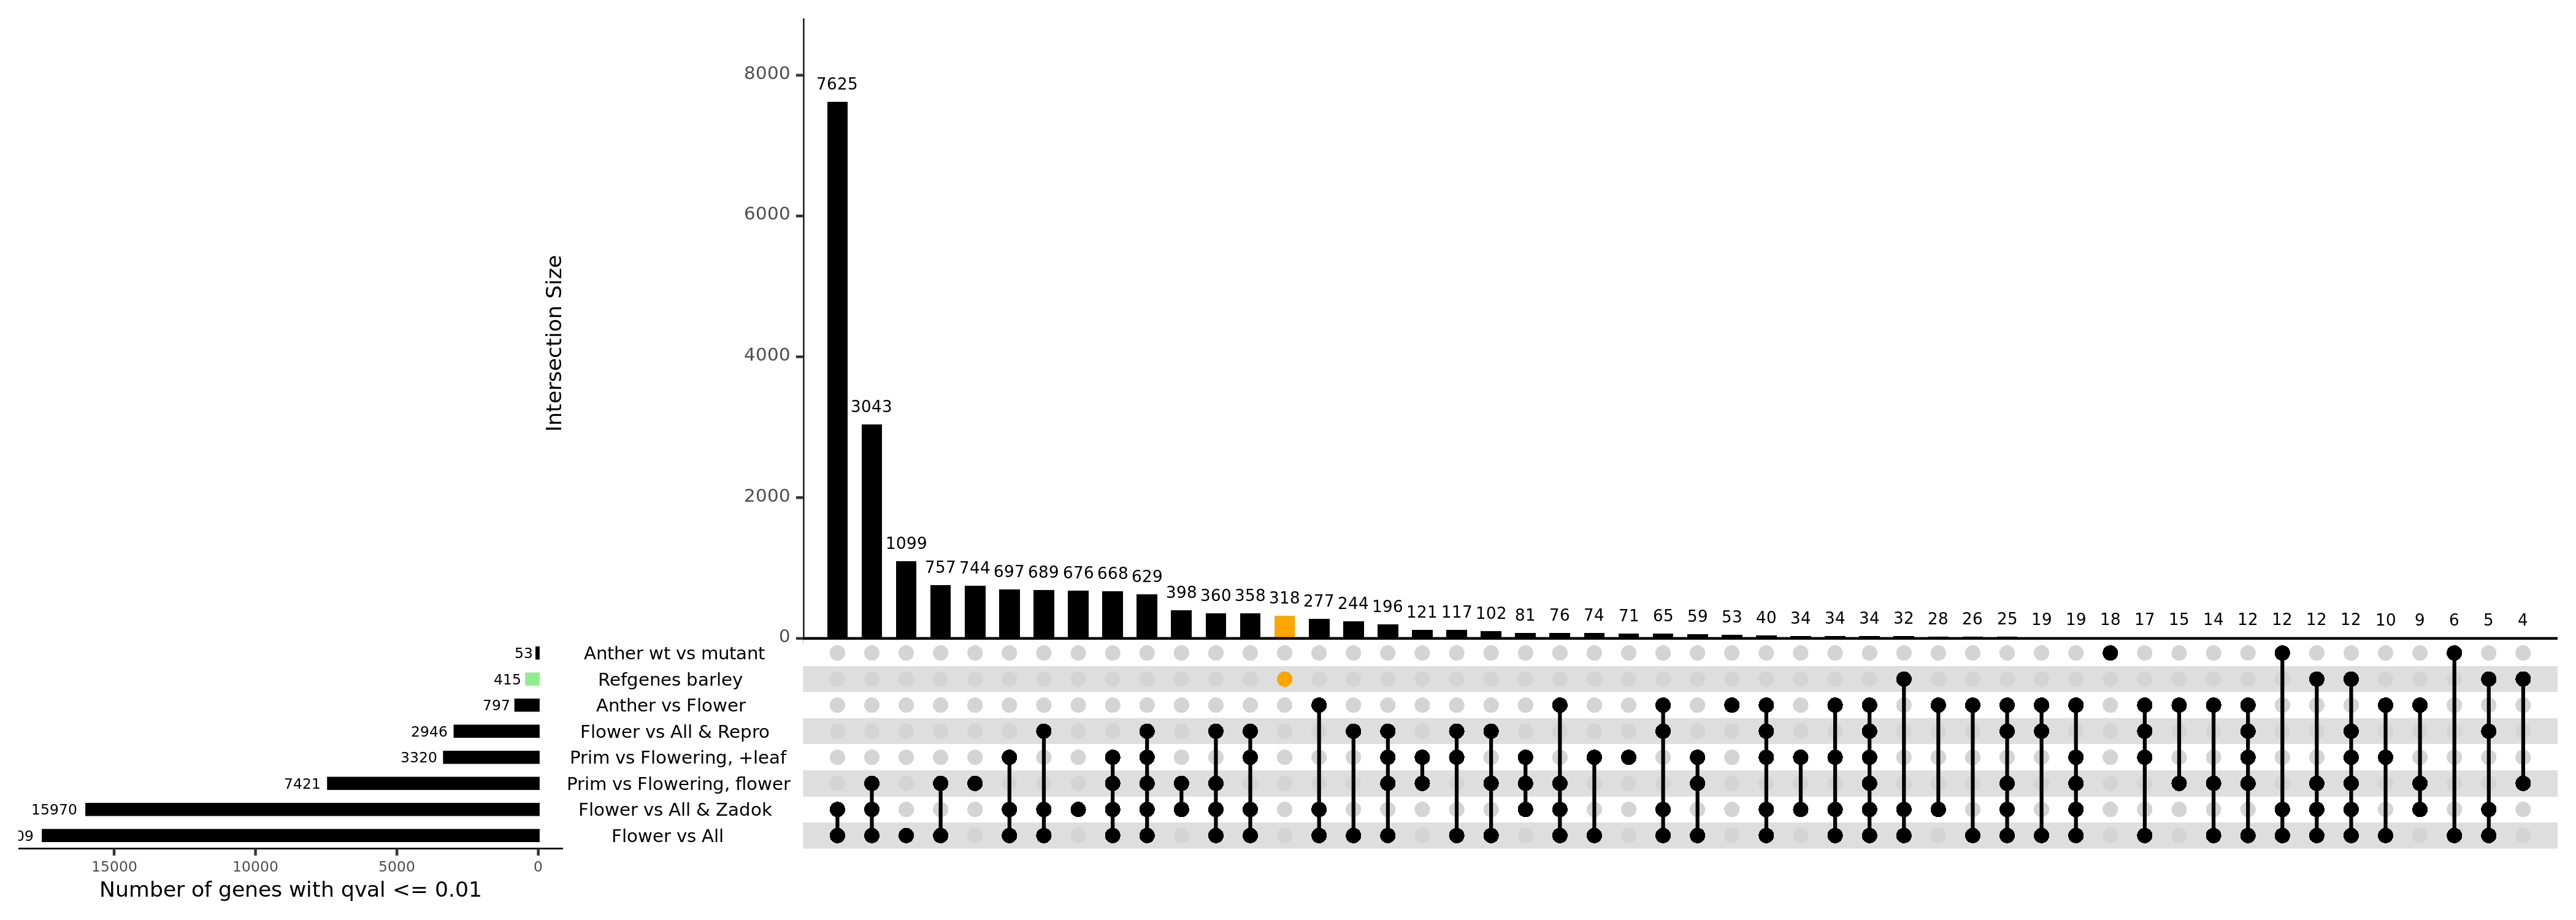

In [122]:
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p1 <- upset(u_b, sets = c("Refgenes barley", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 50,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "black", "lightgreen", "black"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes barley"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.01")
p1

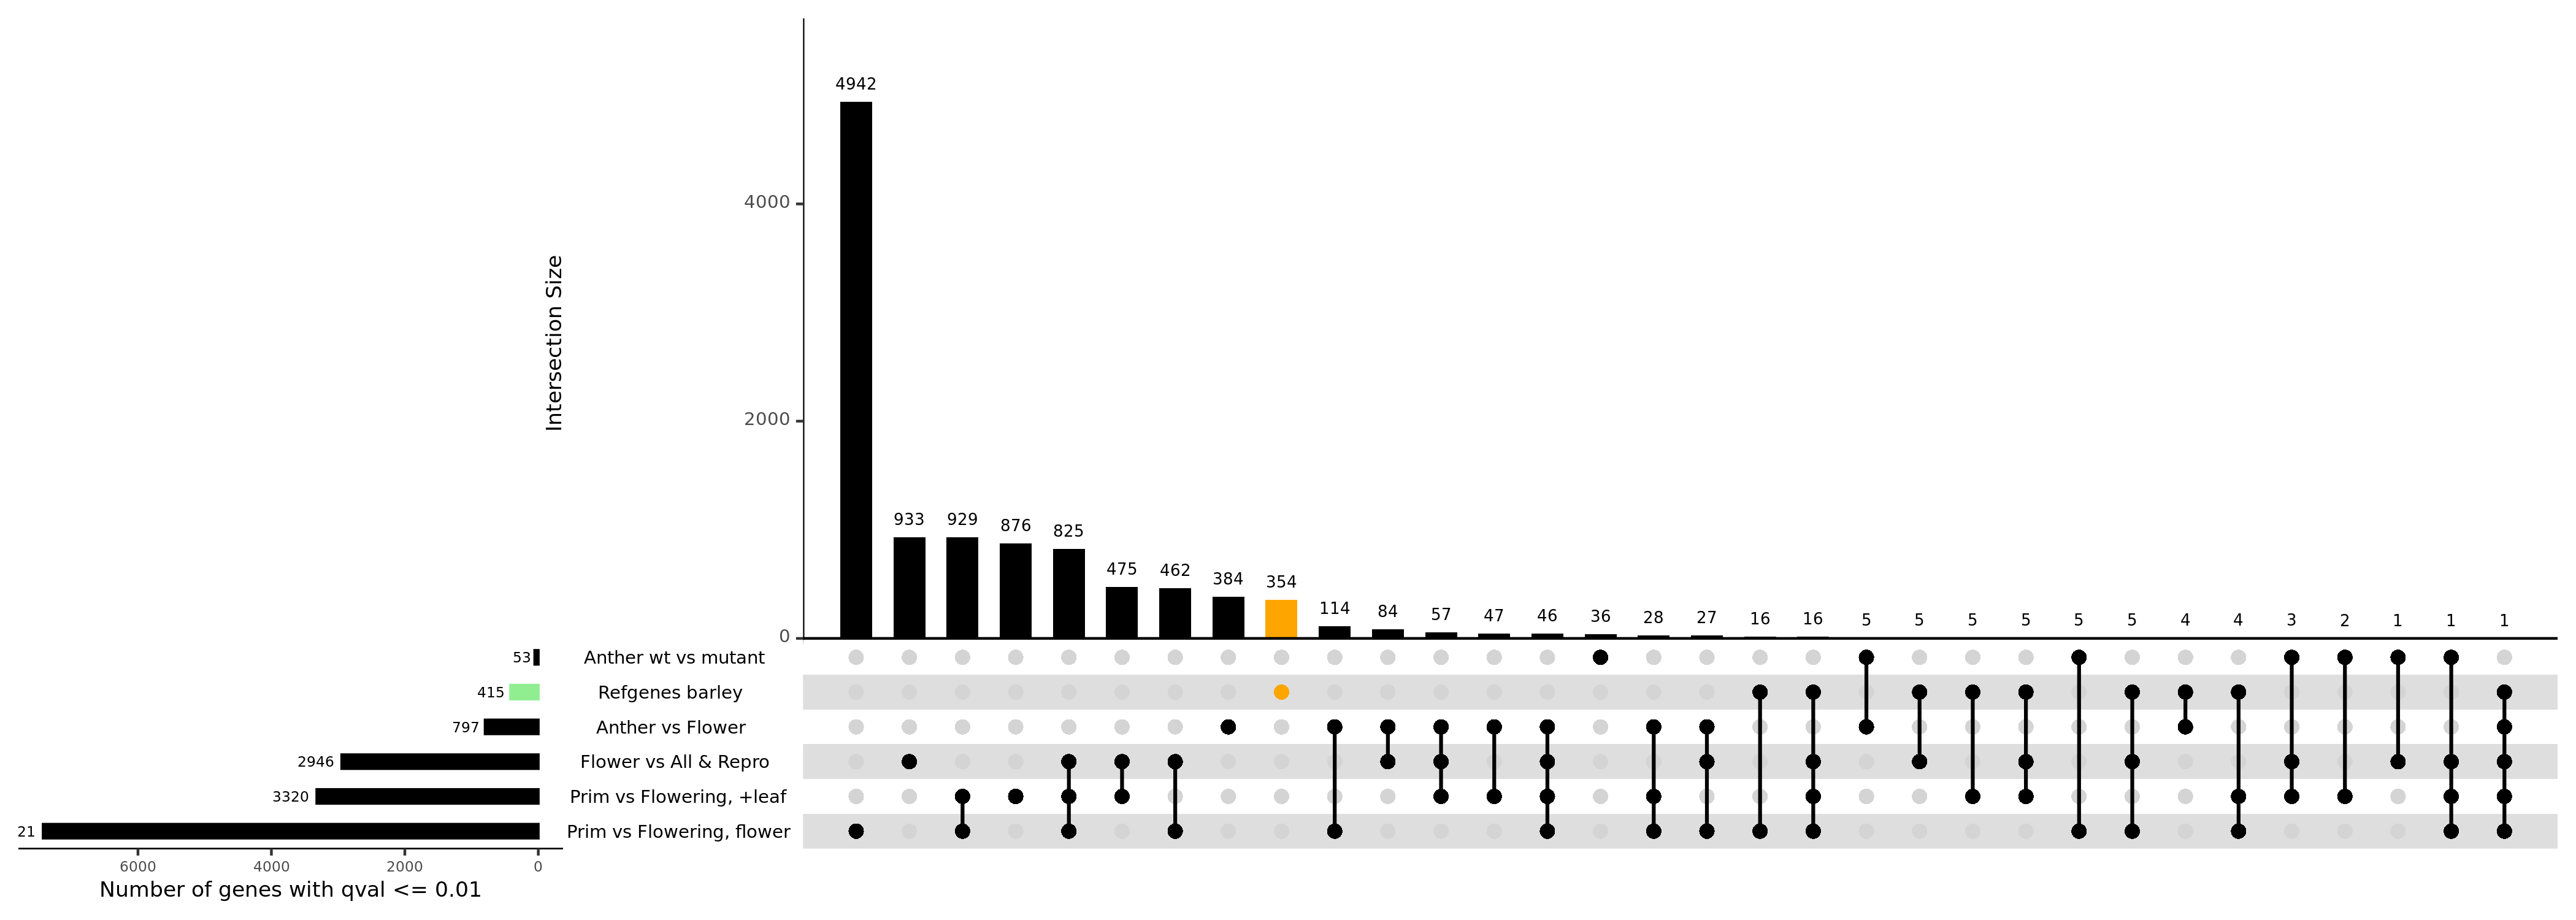

In [124]:
# display selected options
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p11 <- upset(u_b, sets = c("Refgenes barley", "Flower vs All & Repro", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 50,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "lightgreen", "black"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes barley"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.01")
p11

In [111]:
# build upset object for barley with qval <= 0.05
listInput_b <- list(ref_hord, id_f1_b_05, id_f2_b_05, id_f3_b_05, id_f4_b_05, id_f5_b_05, id_a1_b_05, id_a2_b_05)
u_b_05 <- fromList(listInput_b)
colnames(u_b_05) <- c("Refgenes barley", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant")
str(u_b_05)

'data.frame':	21001 obs. of  8 variables:
 $ Refgenes barley          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flower vs All & Repro    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Flower vs All            : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Flower vs All & Zadok    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Prim vs Flowering, +leaf : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Prim vs Flowering, flower: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther vs Flower         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther wt vs mutant      : int  0 0 0 0 0 0 0 0 0 0 ...


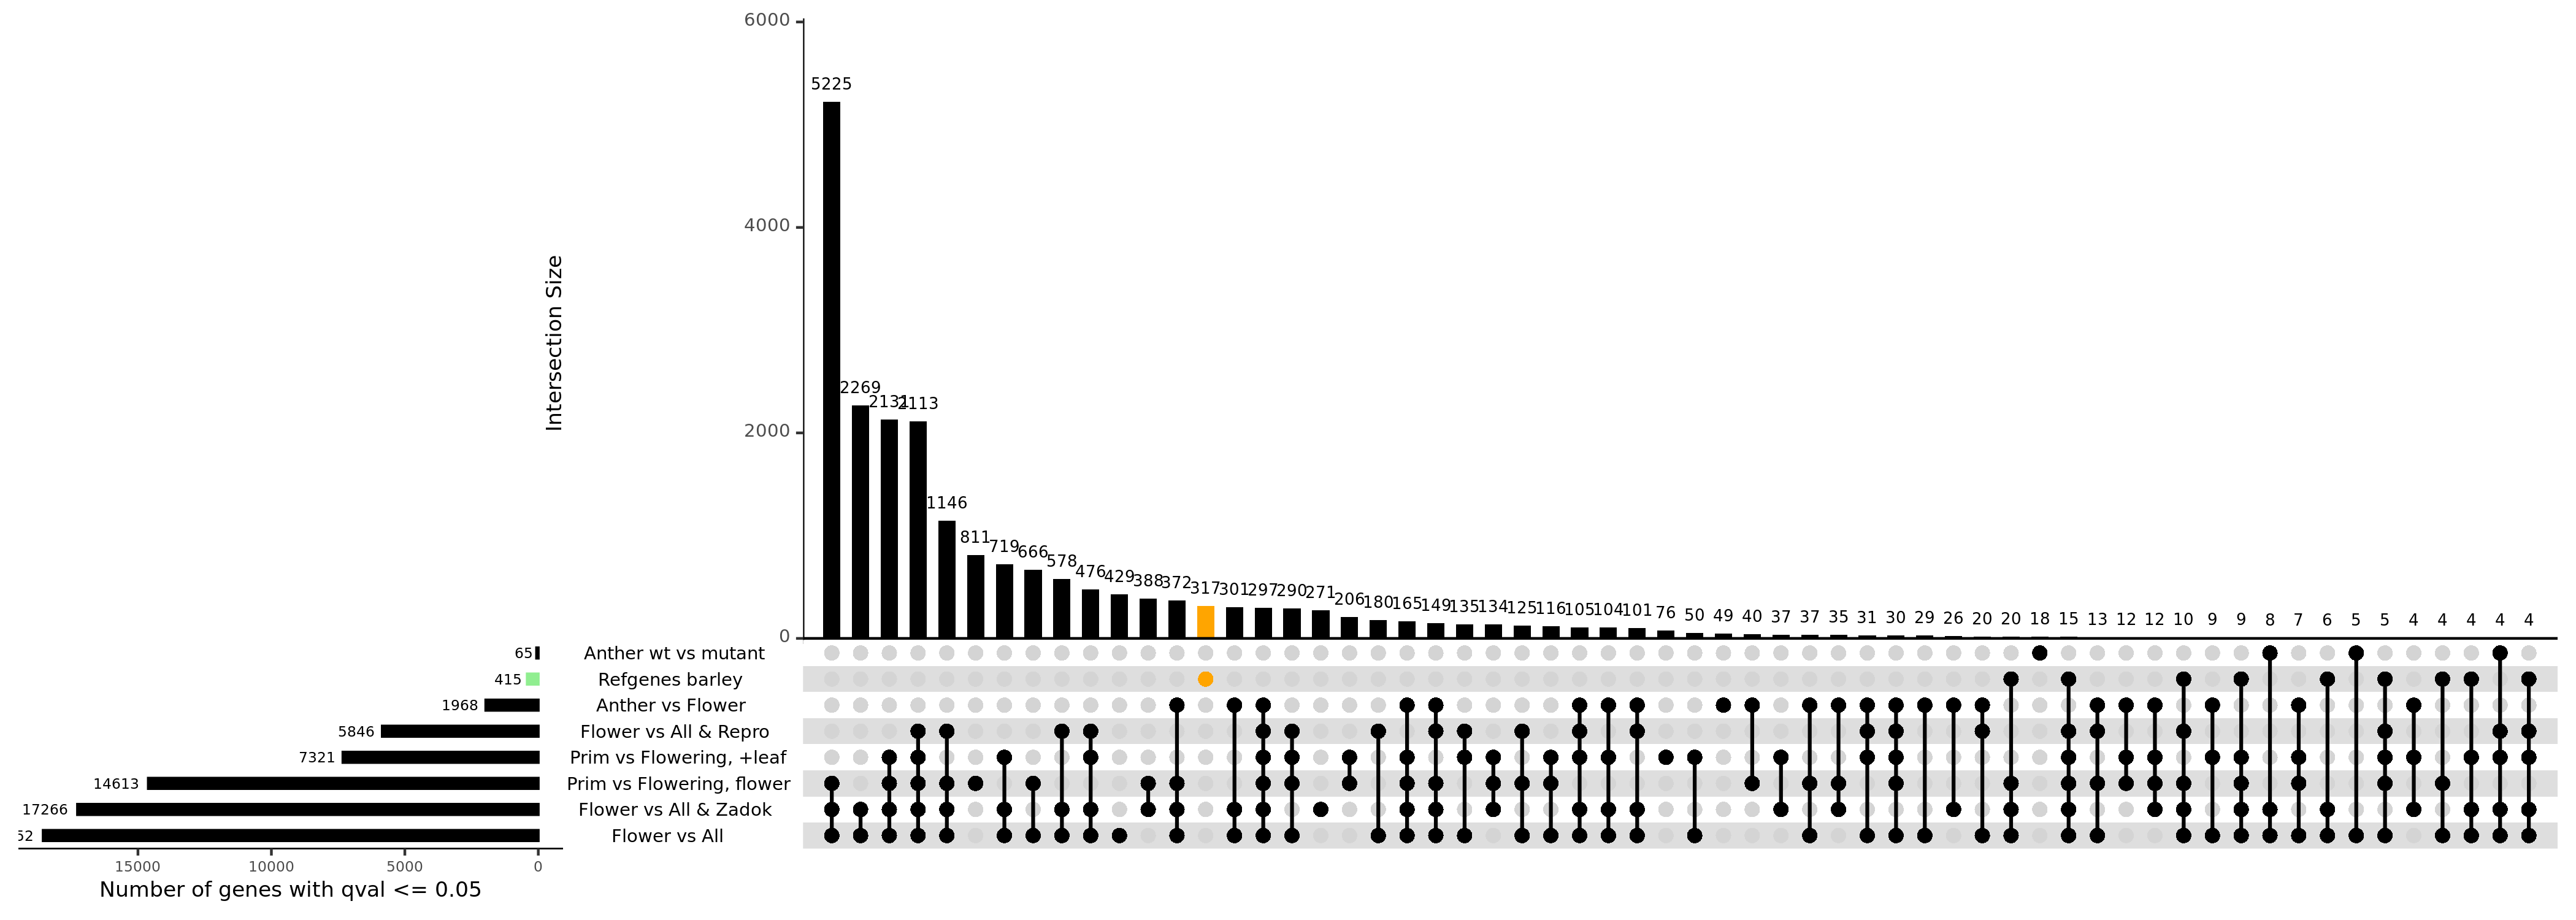

In [121]:
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p2 <- upset(u_b_05, sets = c("Refgenes barley", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), 
            nintersects = 60, order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "black", "lightgreen", "black"),
            matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
            queries = list(list(query = intersects, params = list("Refgenes barley"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.05")
p2

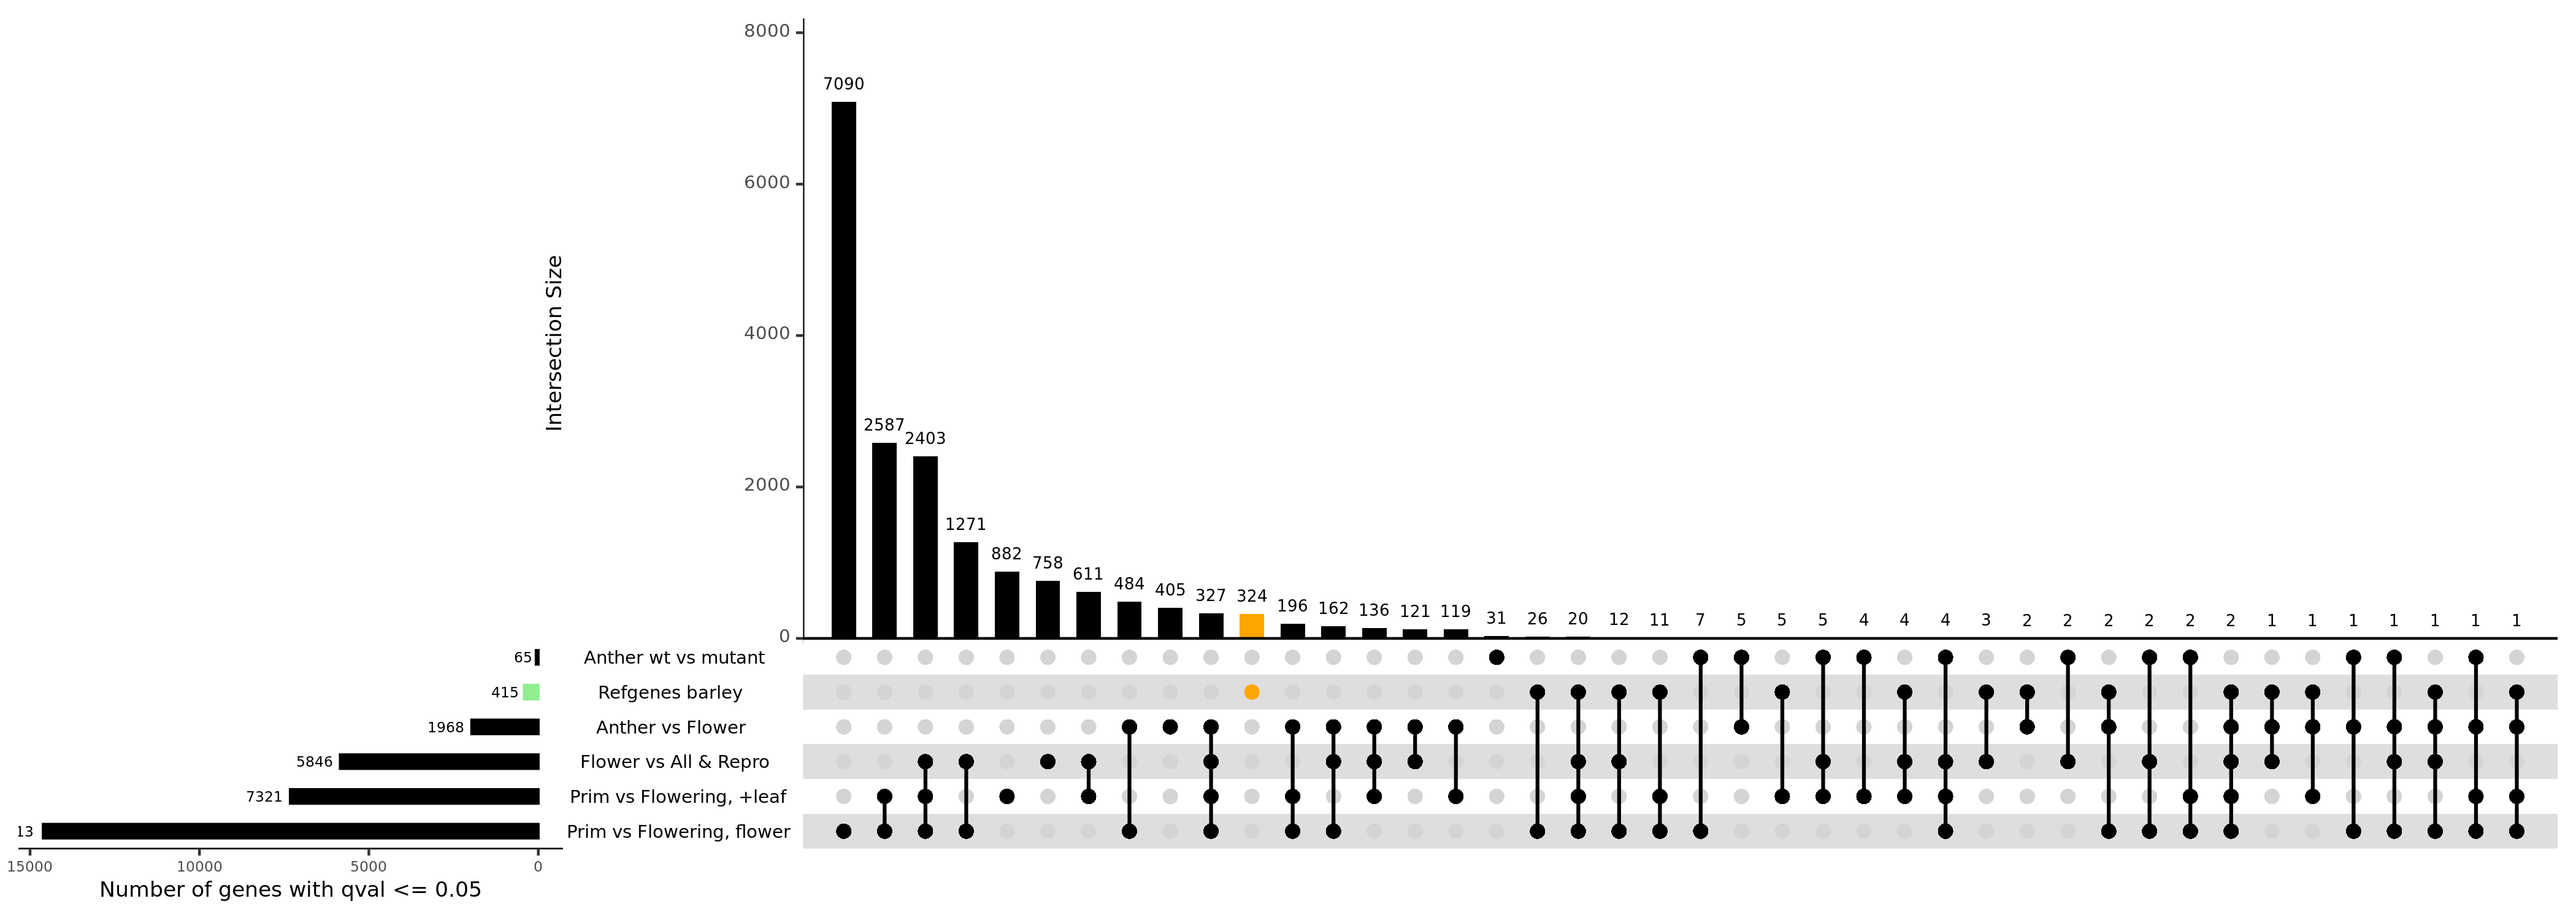

In [127]:
# display selected options
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p22 <- upset(u_b_05, sets = c("Refgenes barley", "Flower vs All & Repro", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 50,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "lightgreen", "black"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes barley"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.05")
p22

In [109]:
# build upset object for barley with qval <= 0.1
listInput_b <- list(ref_hord, id_f1_b_1, id_f2_b_1, id_f3_b_1, id_f4_b_1, id_f5_b_1, id_a1_b_1, id_a2_b_1)
u_b_1 <- fromList(listInput_b)
colnames(u_b_1) <- c("Refgenes barley", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant")
str(u_b_1)

'data.frame':	21337 obs. of  8 variables:
 $ Refgenes barley          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flower vs All & Repro    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Flower vs All            : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Flower vs All & Zadok    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Prim vs Flowering, +leaf : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Prim vs Flowering, flower: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Anther vs Flower         : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Anther wt vs mutant      : int  0 0 0 0 0 0 0 0 0 0 ...


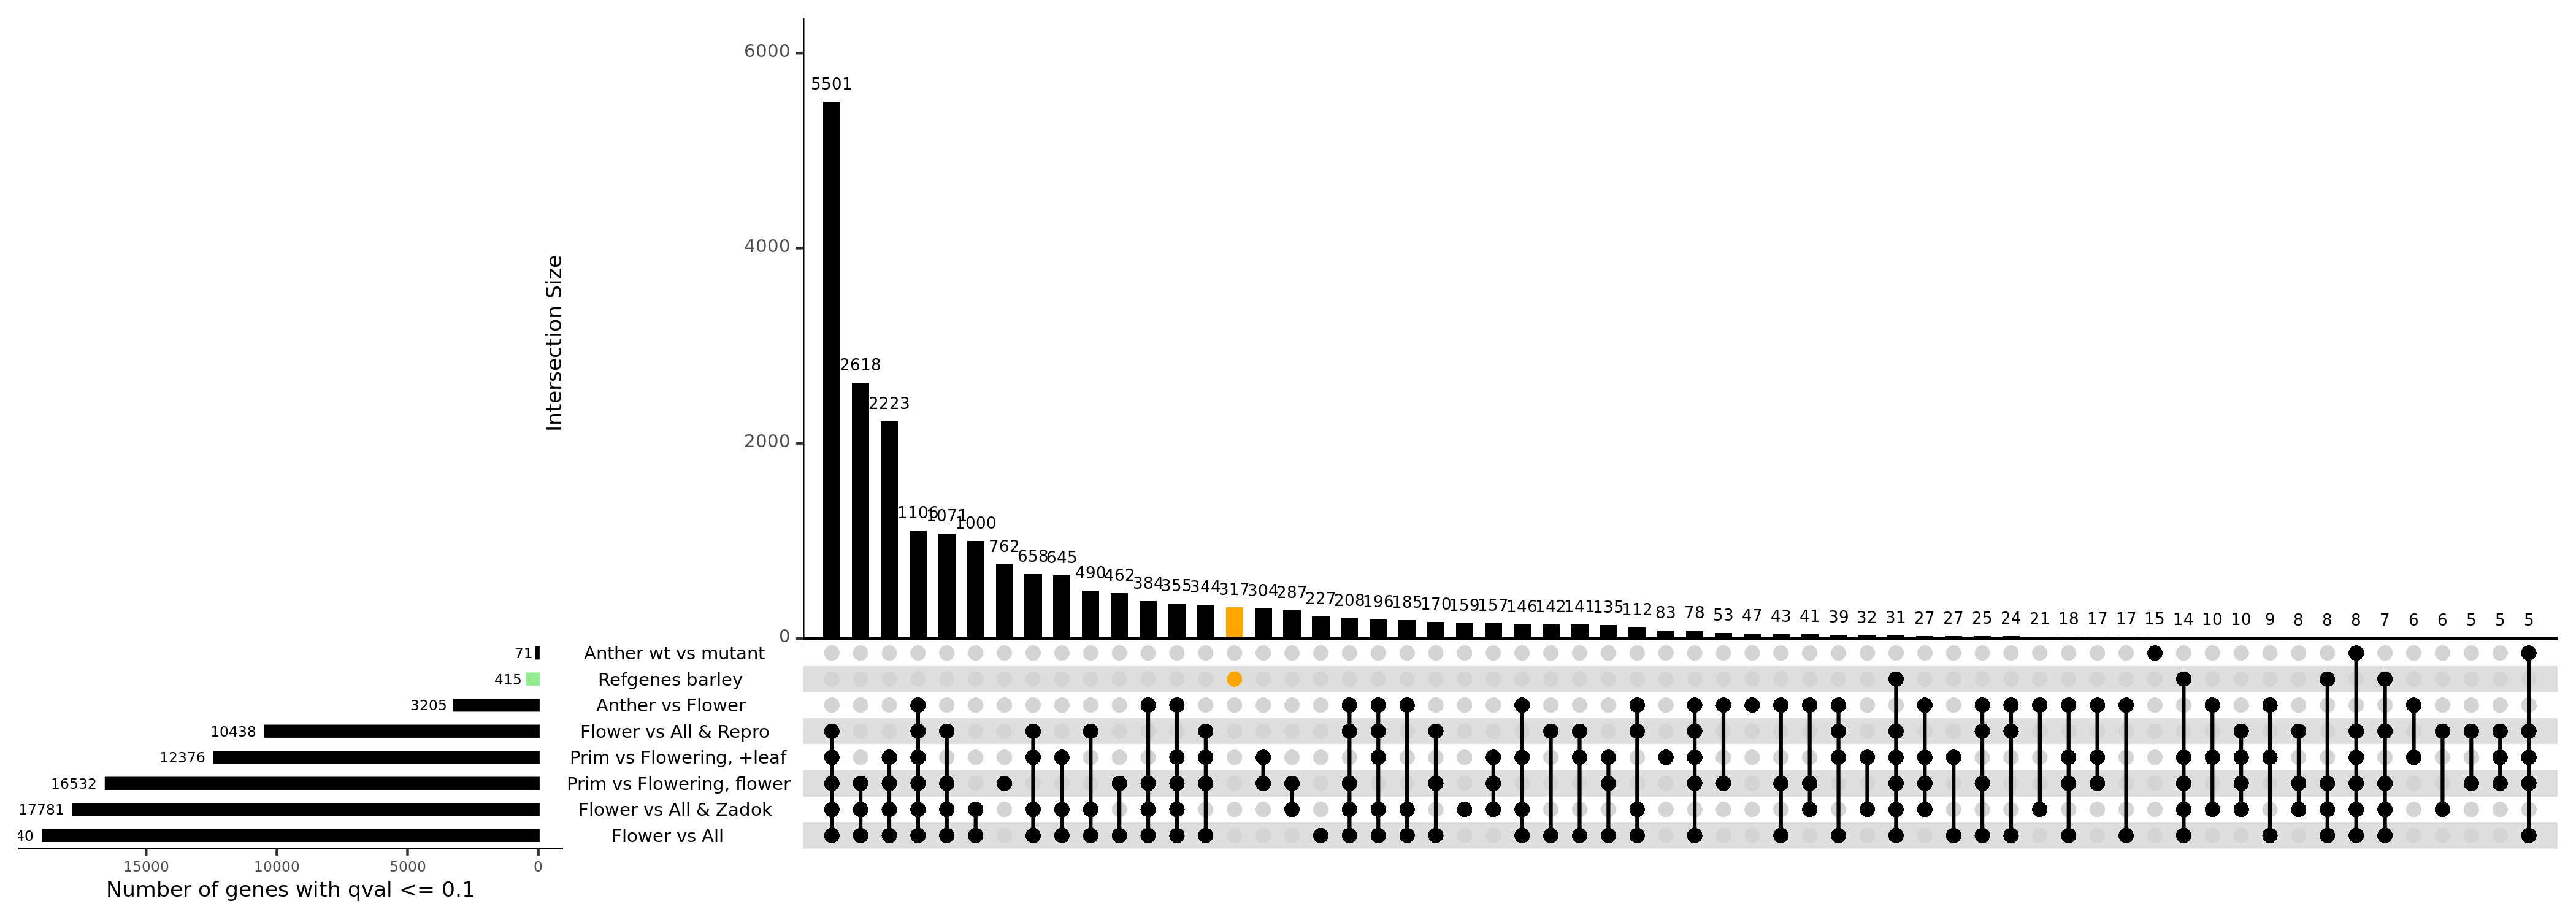

In [123]:
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p3 <- upset(u_b_1, sets = c("Refgenes barley", "Flower vs All & Repro", "Flower vs All", "Flower vs All & Zadok", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), 
            nintersects = 60, order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "black", "black", "lightgreen", "black"),
            matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
            queries = list(list(query = intersects, params = list("Refgenes barley"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.1")
p3

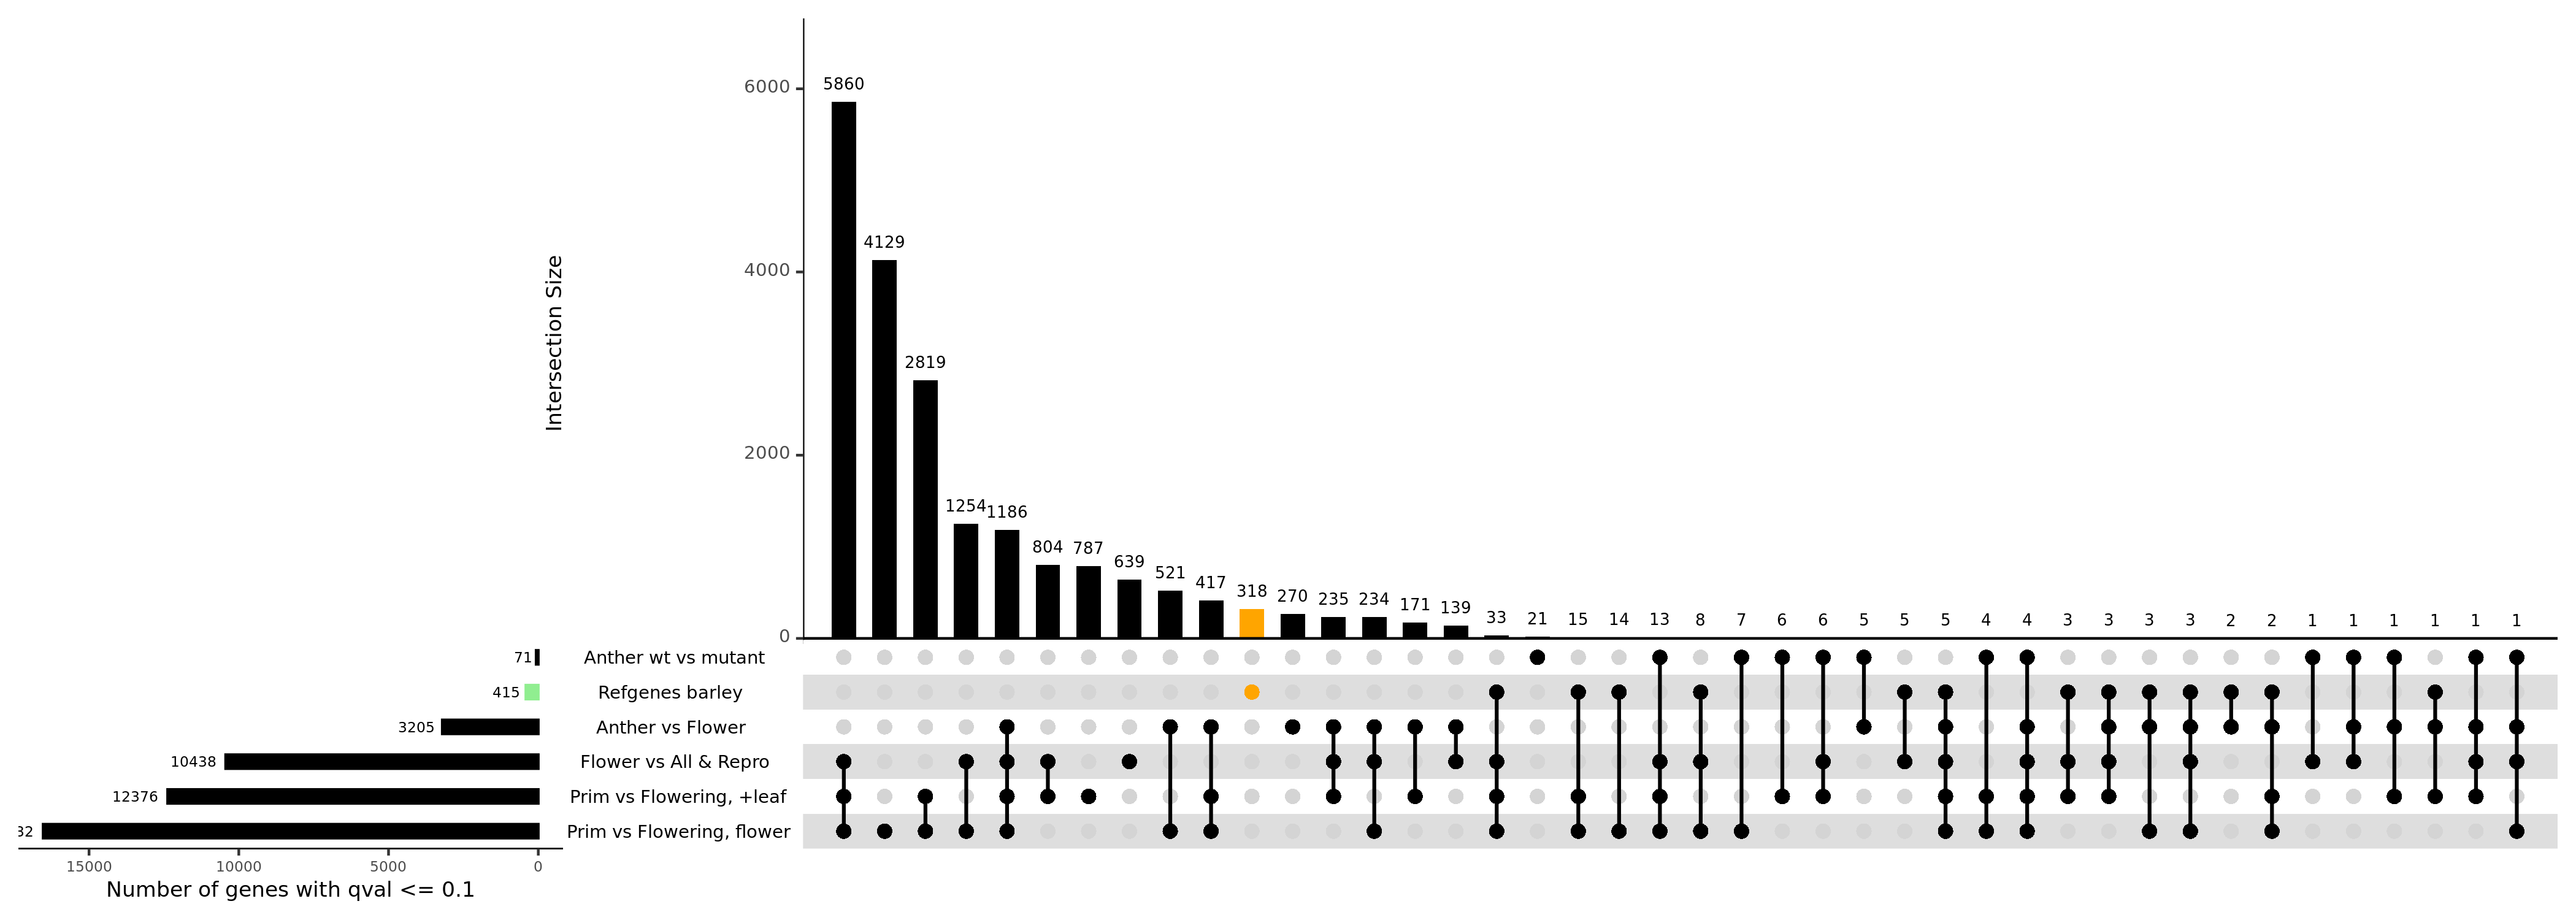

In [126]:
# display selected options
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)
p33 <- upset(u_b_1, sets = c("Refgenes barley", "Flower vs All & Repro", "Prim vs Flowering, +leaf", "Prim vs Flowering, flower", "Anther vs Flower", "Anther wt vs mutant"), nintersects = 50,
      order.by = "freq", main.bar.color = "black", matrix.color = "black", shade.color = "lightgrey", sets.bar.color =c("black", "black", "black", "black", "lightgreen", "black"), 
      matrix.dot.alpha = 30, shade.alpha = 0.75, set_size.show = T, text.scale = c(1, 1, 1, 0.8, 1, 1), point.size = 2.5,
      queries = list(list(query = intersects, params = list("Refgenes barley"), color = "orange", active = T)),
      mainbar.y.label = "Intersection Size", sets.x.label = "Number of genes with qval <= 0.1")
p33

In [5]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/vanda.marosi/anaconda3/envs/r/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pheatmap_1.0.12    RColorBrewer_1.1-2 cowplot_1.0.0      forcats_0.5.0     
 [5] stringr_1.4.0      dplyr_0.8.5        purrr_0.3.4        readr_1.3.1       
 [9] tidyr_1.0.2        tibble_3.0.1       ggplot2_3.3.0      tidyverse_1.2.1   
[13] UpSetR_1.4.0      

loaded via a namespace (and n